In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
scp= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
scp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###### Performing EDA

In [3]:
# checking shape of data
scp.shape

(1470, 35)

In [4]:
# checking data type
scp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#checking unique value in each row
scp.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
# checking null value
scp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

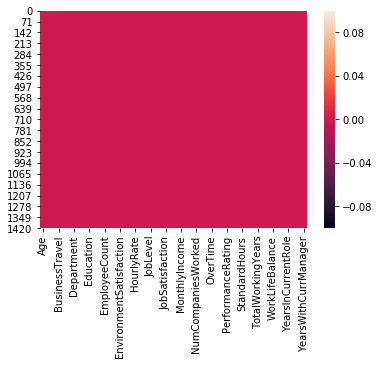

In [7]:
# heatmap of null value
sns.heatmap(scp.isnull())

In [8]:
# checking the data description
scp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# corelation between coloums
scp.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


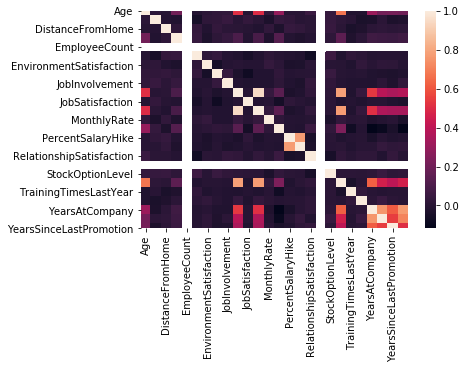

In [10]:
# heat map of corelation
sns.heatmap(scp.corr())

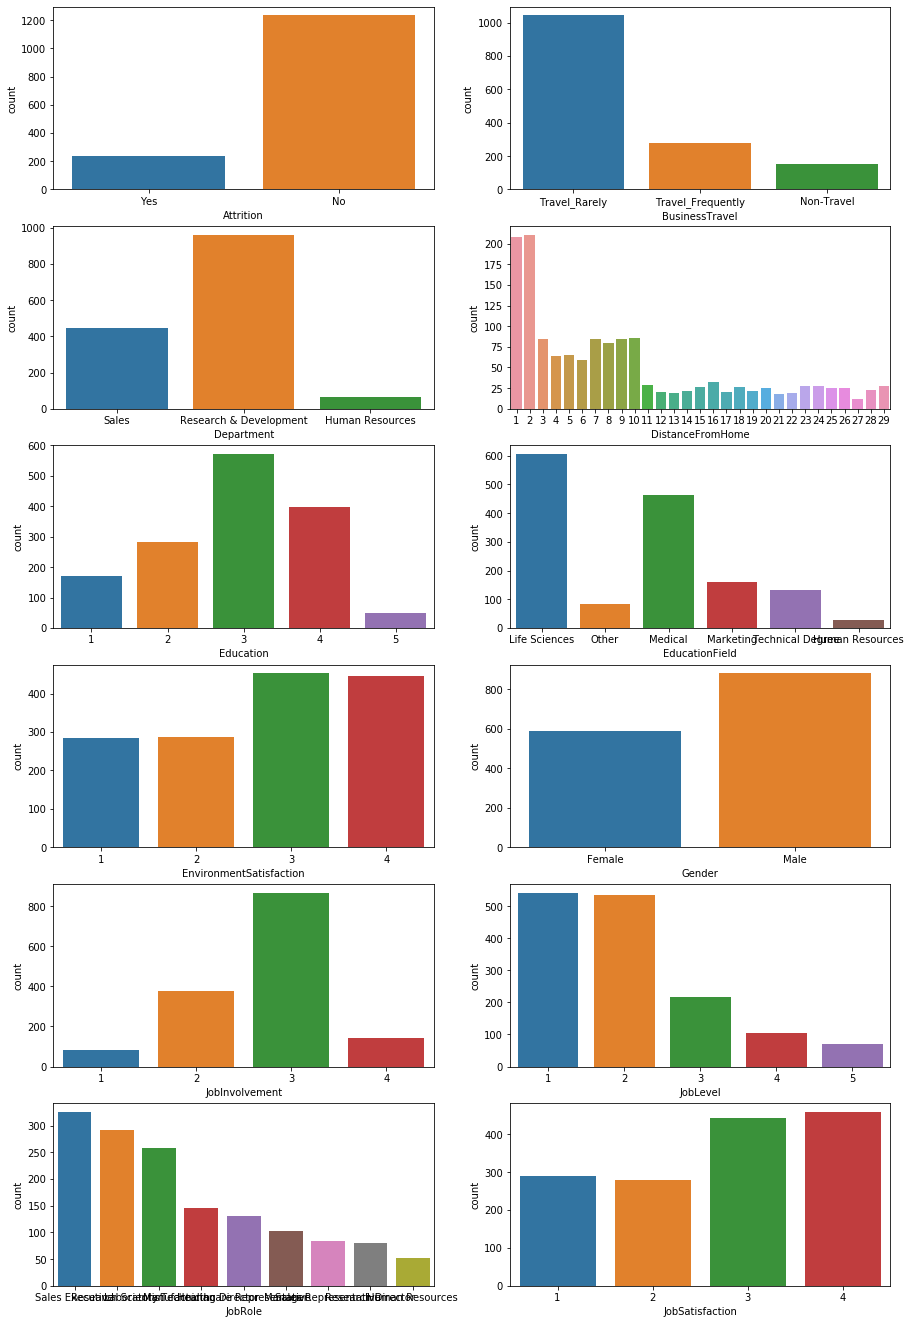

In [11]:
#creating barplot of colums to check the count of indivisual value
count=scp[['Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
           'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction']]

figure(num=None,figsize=(15,80))
for column_index,col in enumerate(count.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(x=count[col],data=count)

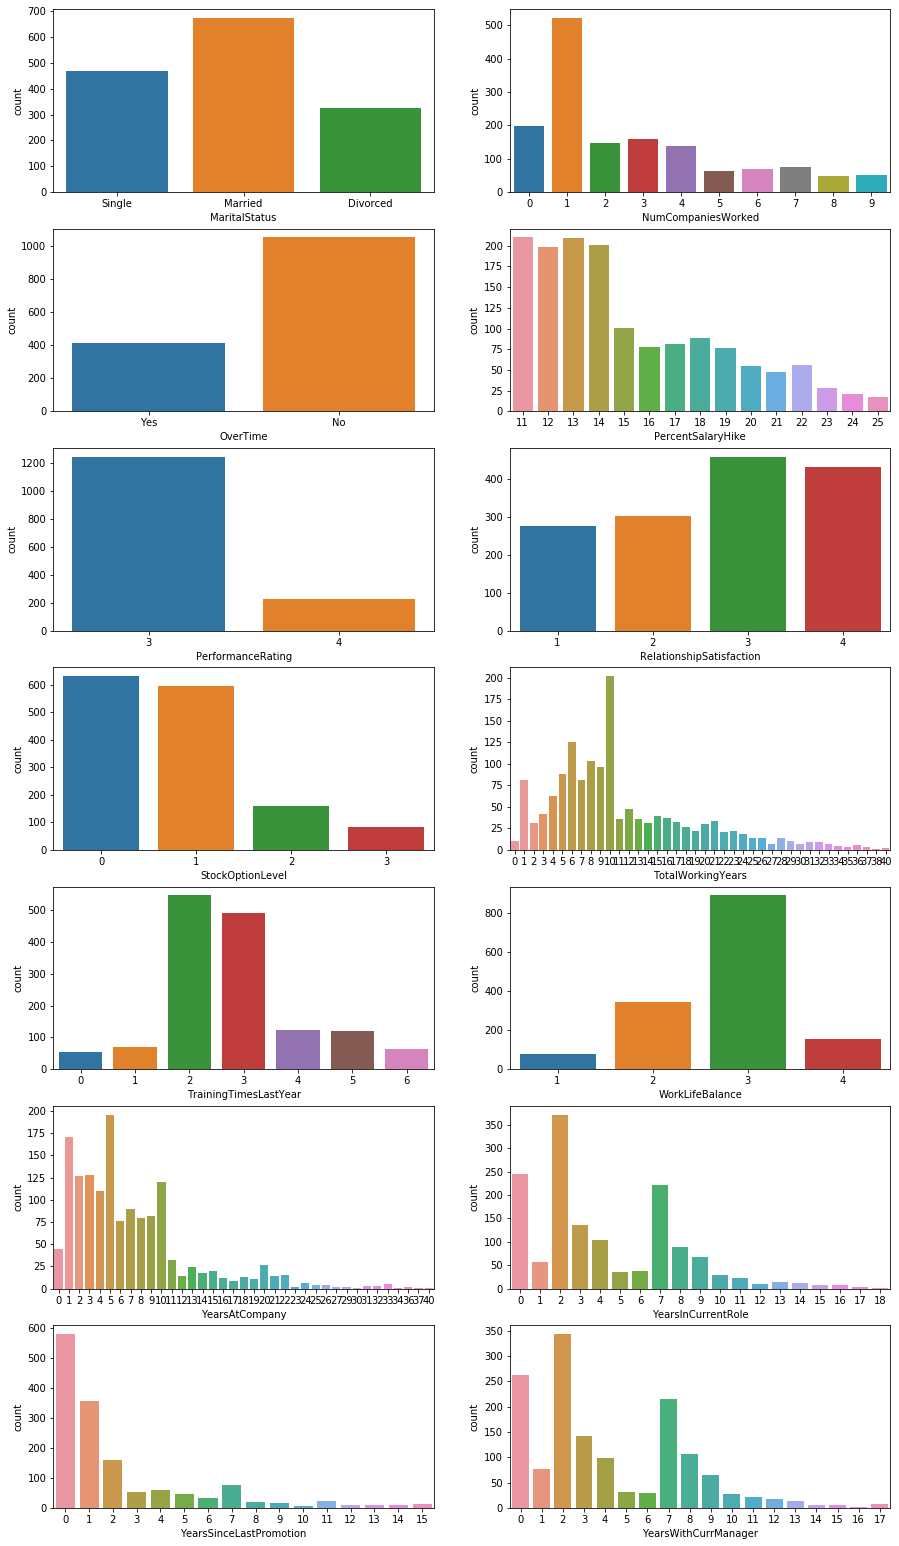

In [12]:
#creating barplot of colums to check the count of indivisual value
count=scp[['MaritalStatus','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating',
           'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
           'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

figure(num=None,figsize=(15,80))
for column_index,col in enumerate(count.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(x=count[col],data=count)

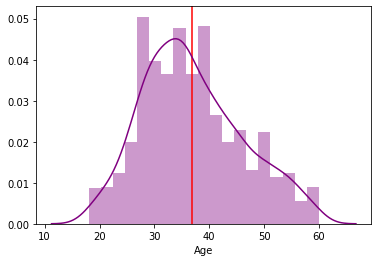

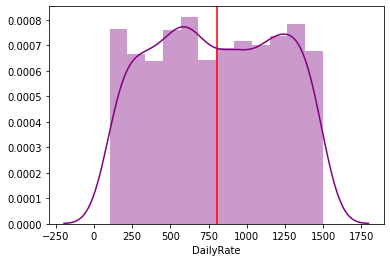

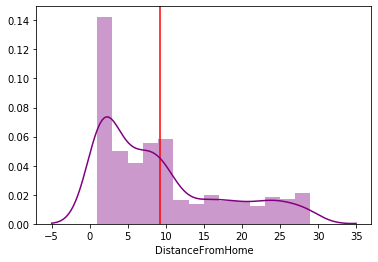

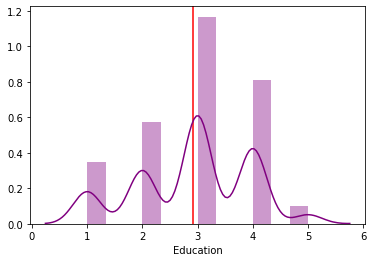

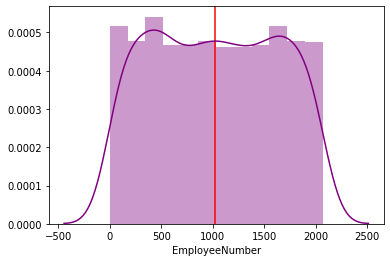

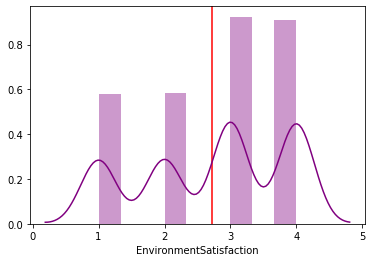

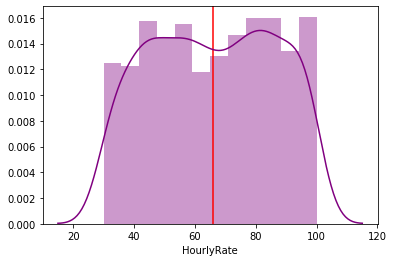

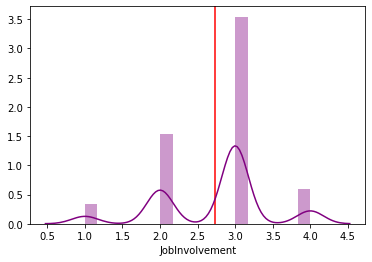

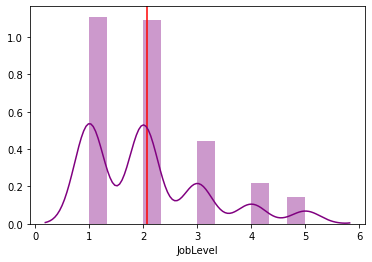

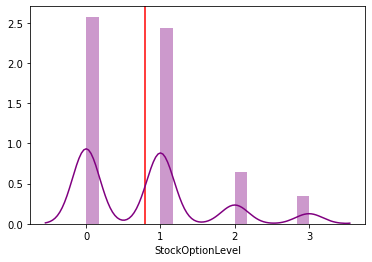

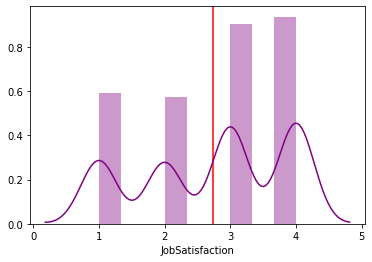

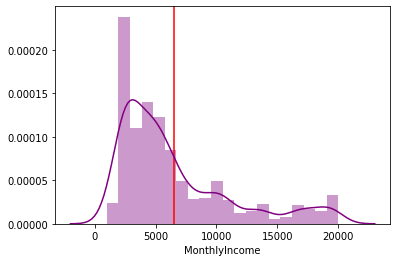

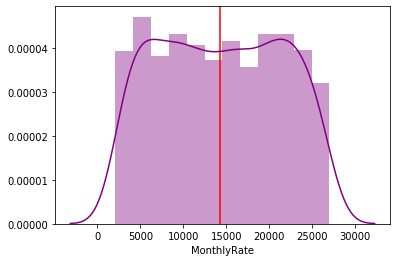

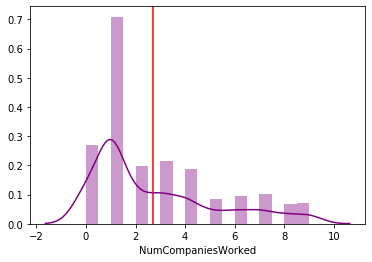

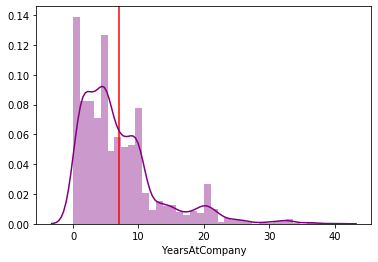

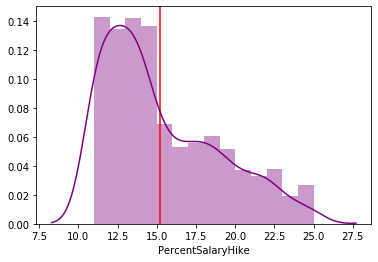

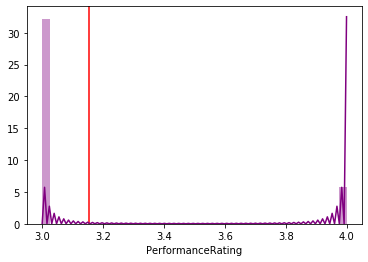

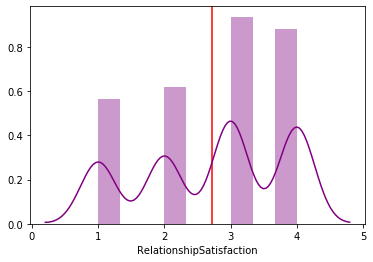

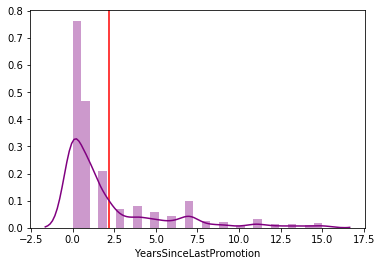

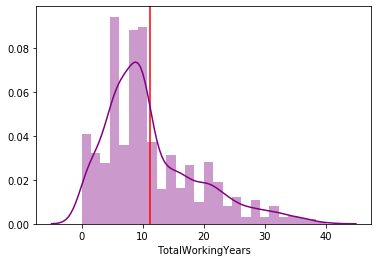

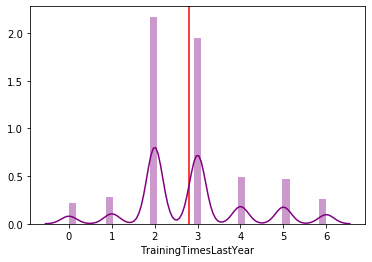

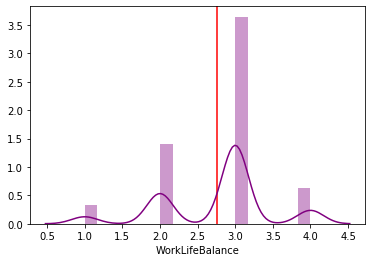

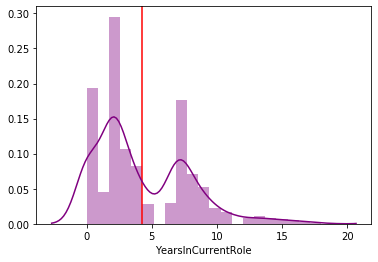

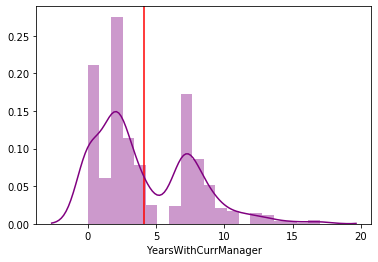

In [13]:
# Histogram - Distribution plot for all continous variables to visualize skewness
Index=scp[['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
           'JobInvolvement','JobLevel','StockOptionLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
           'YearsAtCompany','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','YearsSinceLastPromotion',
           'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsWithCurrManager']]
for i,col in enumerate(Index):
    plt.figure(i)
    plt.axvline(scp[col].mean(),color = 'r')
    sns.distplot(scp[col],color='purple')

Age                            AxesSubplot(0.125,0.848277;0.352273x0.0317227)
DailyRate                   AxesSubplot(0.547727,0.848277;0.352273x0.0317227)
DistanceFromHome                AxesSubplot(0.125,0.81021;0.352273x0.0317227)
Education                    AxesSubplot(0.547727,0.81021;0.352273x0.0317227)
EmployeeCount                  AxesSubplot(0.125,0.772143;0.352273x0.0317227)
EmployeeNumber              AxesSubplot(0.547727,0.772143;0.352273x0.0317227)
EnvironmentSatisfaction        AxesSubplot(0.125,0.734076;0.352273x0.0317227)
HourlyRate                  AxesSubplot(0.547727,0.734076;0.352273x0.0317227)
JobInvolvement                 AxesSubplot(0.125,0.696008;0.352273x0.0317227)
JobLevel                    AxesSubplot(0.547727,0.696008;0.352273x0.0317227)
JobSatisfaction                AxesSubplot(0.125,0.657941;0.352273x0.0317227)
MonthlyIncome               AxesSubplot(0.547727,0.657941;0.352273x0.0317227)
MonthlyRate                    AxesSubplot(0.125,0.619874;0.3522

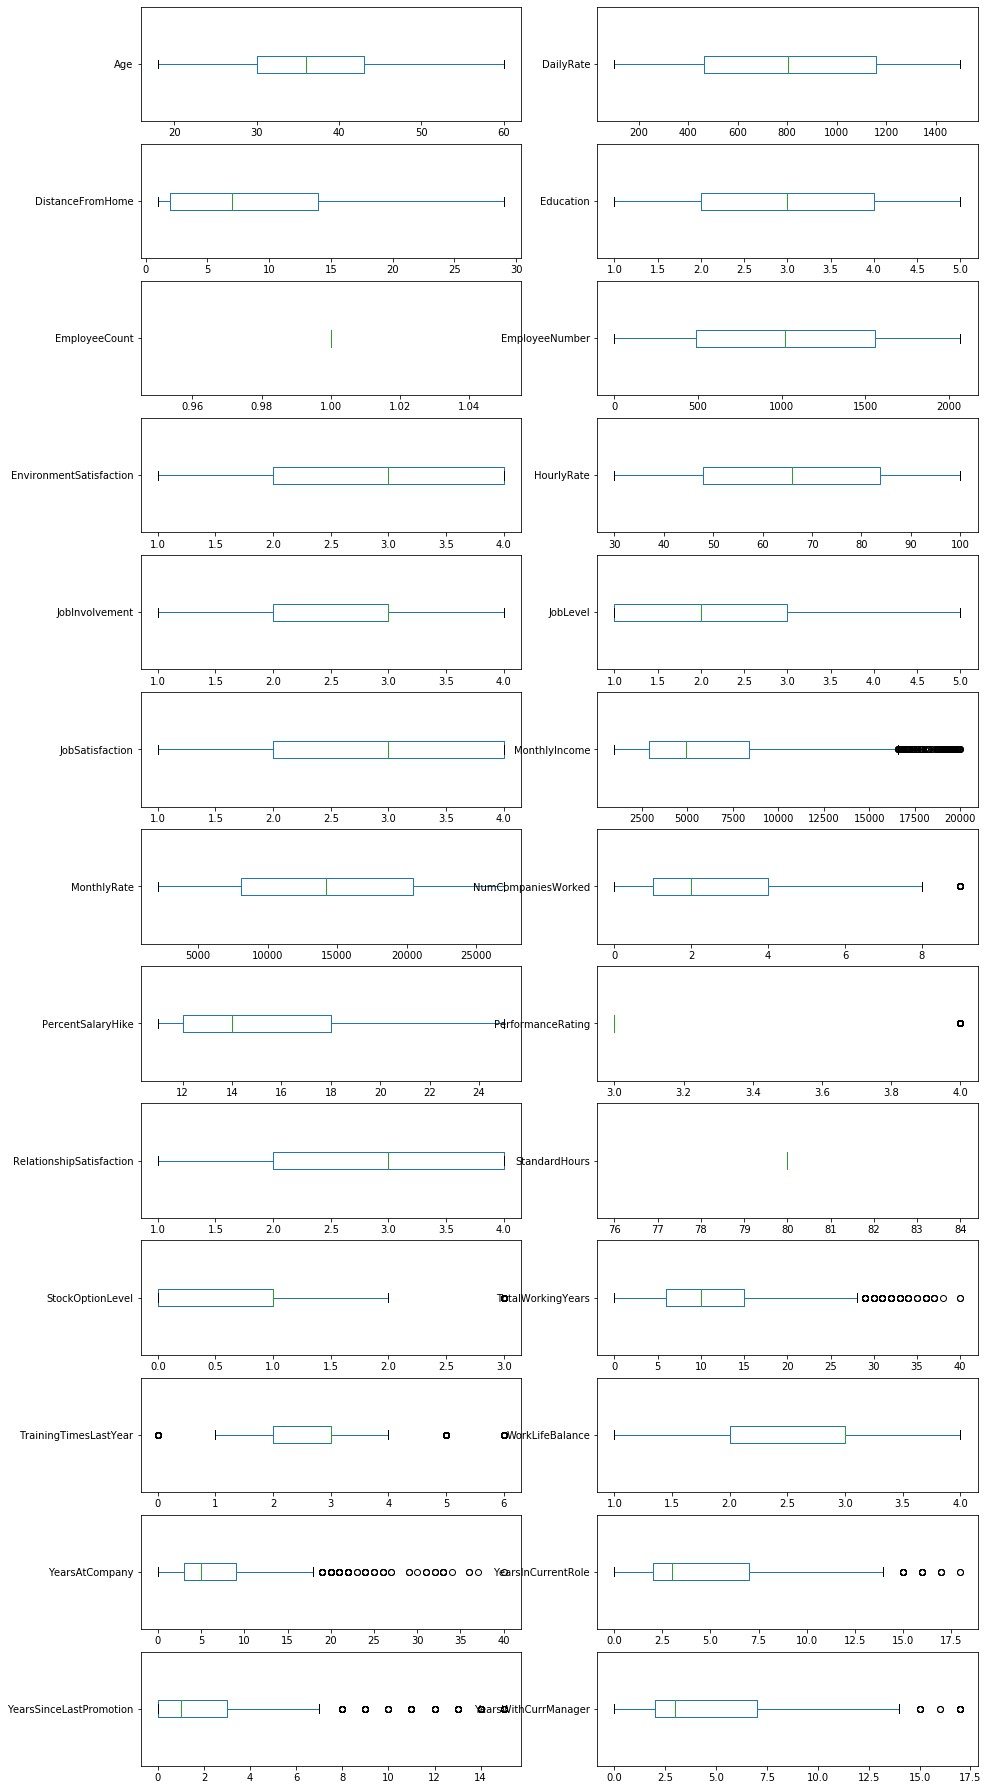

In [14]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
scp.plot(kind='box',subplots=True,layout=(20,2),figsize=(15,50),vert=False,sharex=False)

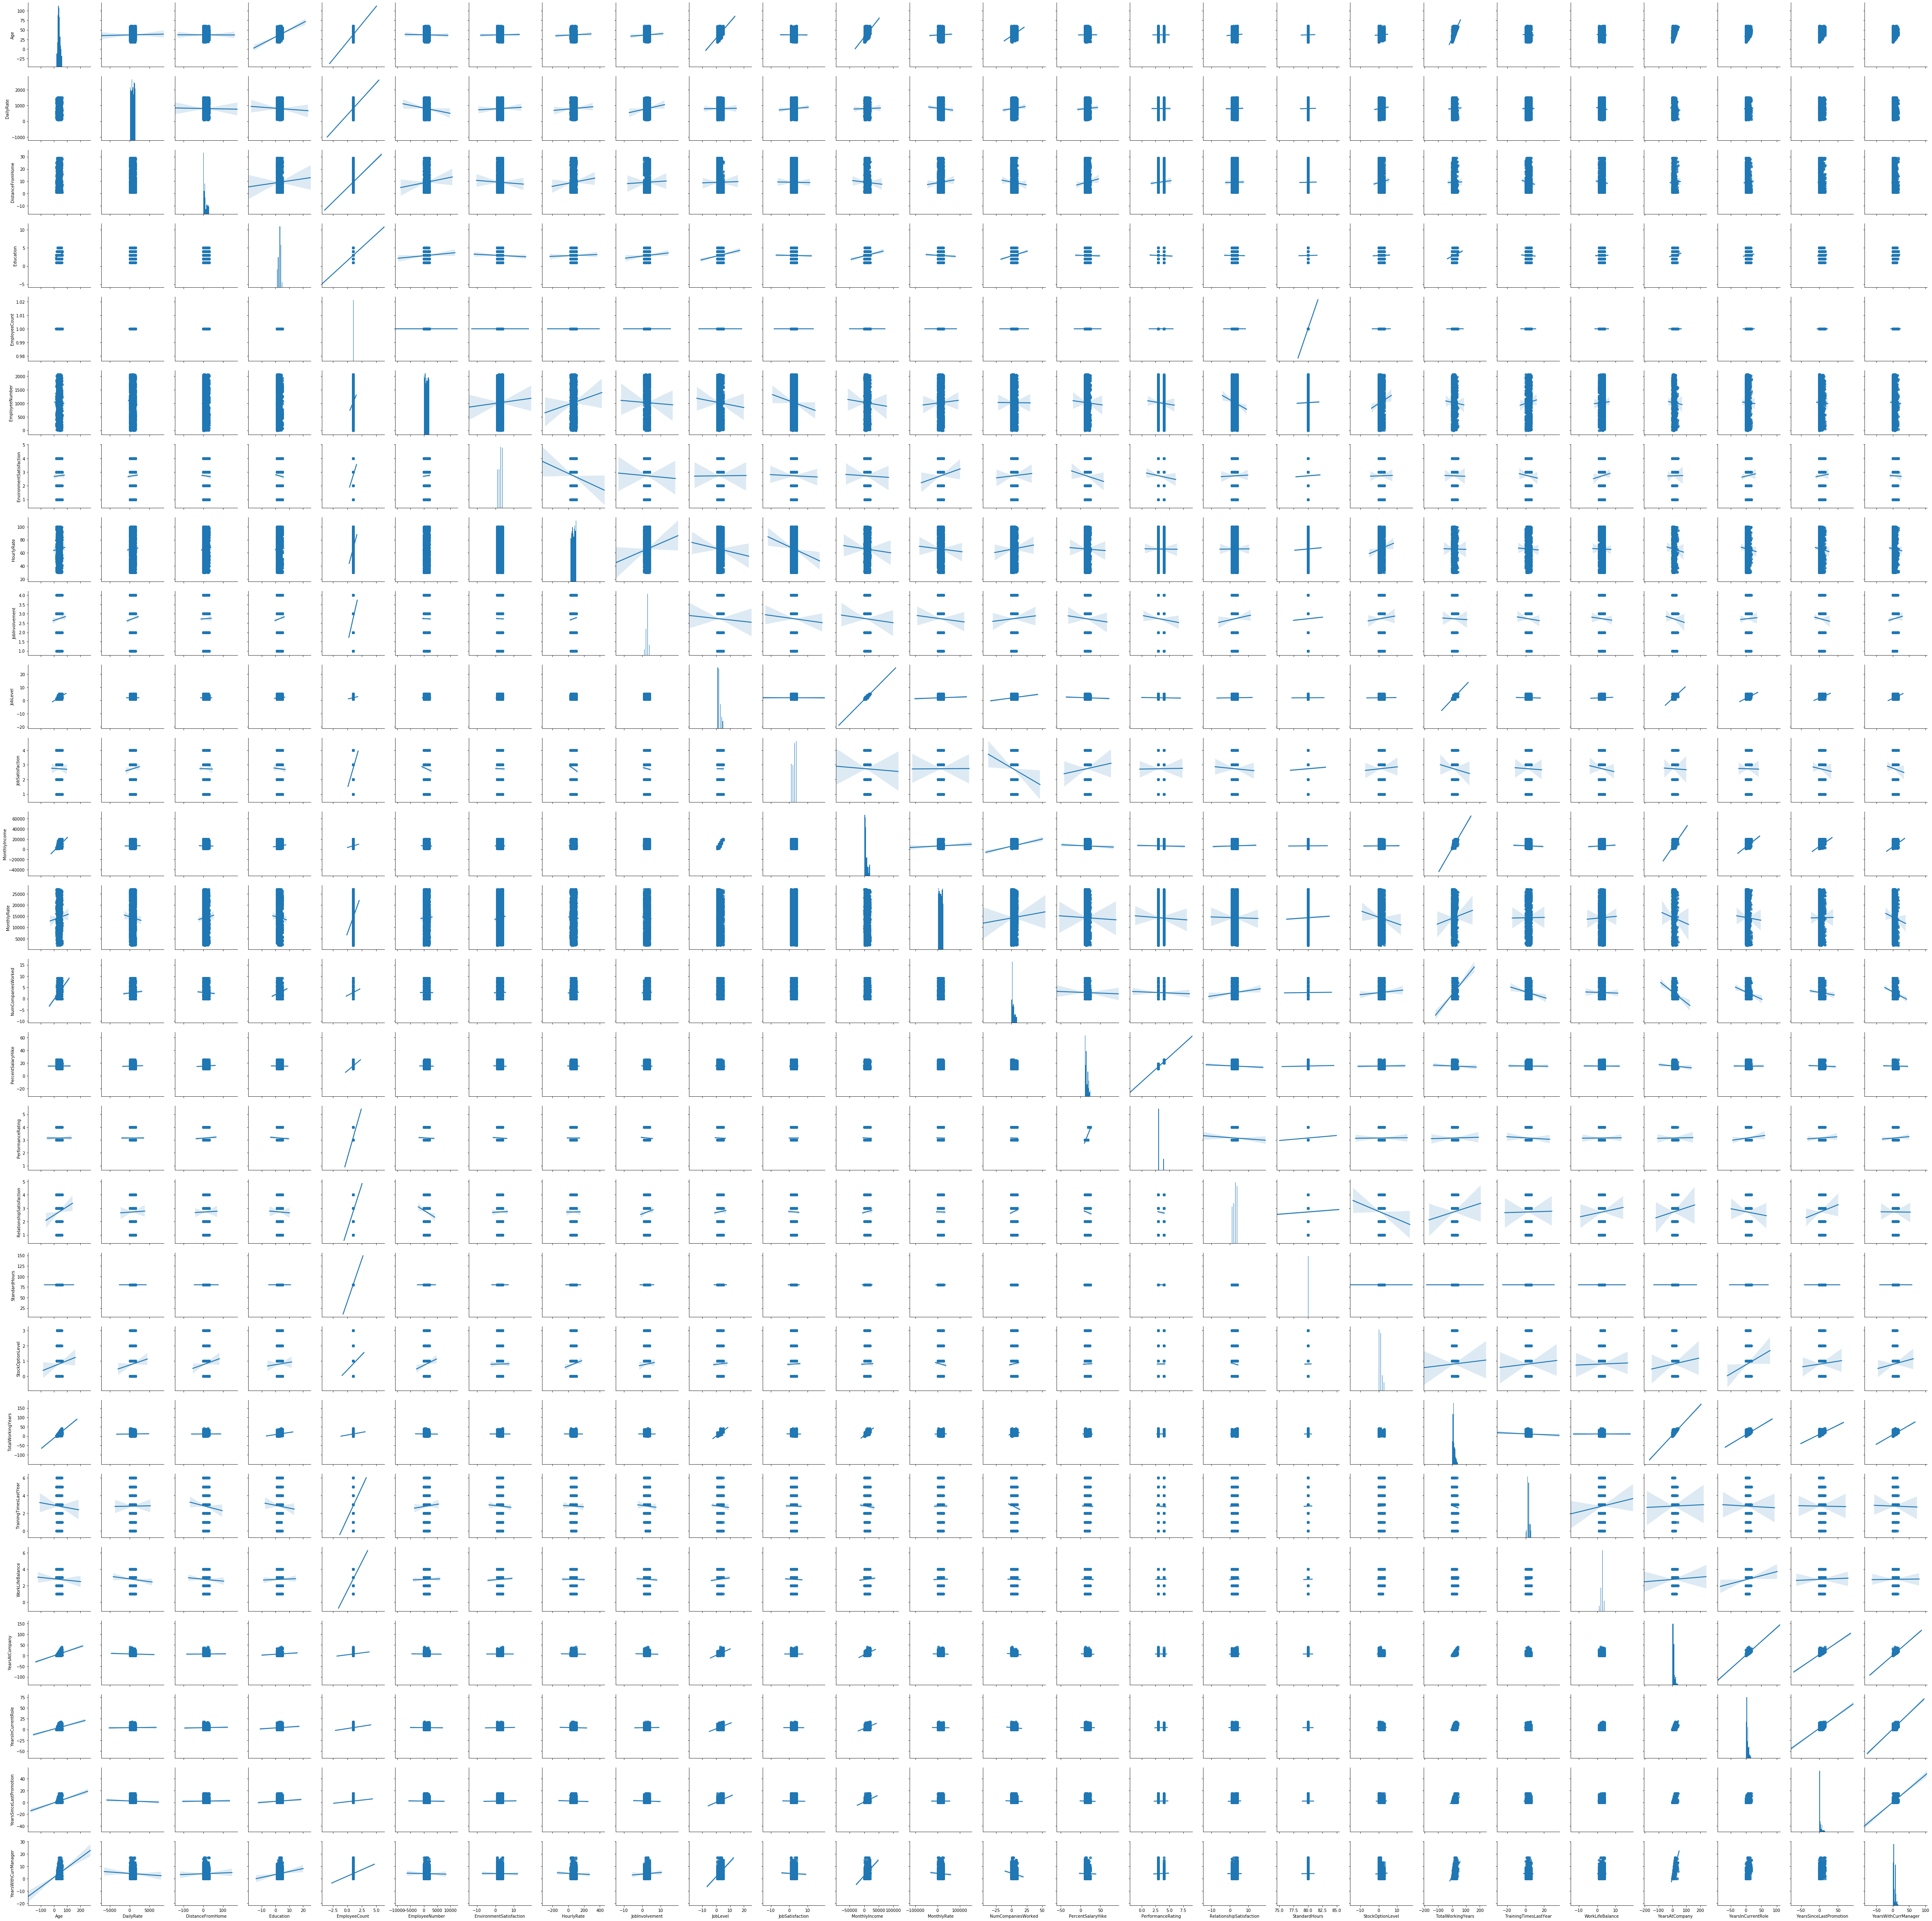

In [15]:
# pair plot to see the scatter of data
sns.pairplot(scp, kind='reg')

###### Manipulating data before bulding the model

In [16]:
#droping irrelevant column
scp=scp.drop(['EmployeeCount','EmployeeNumber','EmployeeNumber','StandardHours'], axis=1)

In [17]:
#Label encoding data
scp1=pd.get_dummies(scp,drop_first=True)
scp1.sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
439,31,534,20,3,1,66,3,3,3,9824,...,0,0,0,0,0,0,0,1,0,0
825,29,718,8,1,2,79,2,2,4,5056,...,0,0,1,0,0,0,0,1,0,1
454,29,232,19,3,4,34,3,2,4,4262,...,0,0,1,0,0,0,0,0,0,0
963,38,1009,2,2,2,31,3,2,1,6893,...,0,0,0,0,0,1,0,0,0,0
1038,48,1221,7,3,3,96,3,2,1,5486,...,0,0,0,0,0,1,0,0,0,0


In [18]:
# dividing dataset into input values 'x' and output value 'y'
x = scp1.drop(['Attrition_Yes'],axis=1)
print('x dataset\n',x.head(),'\n')
y=scp1['Attrition_Yes']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0   

In [19]:
#checking skewness
x.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion           

In [20]:
#removing x
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                    -0.029121
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.448133
JobSatisfaction                     -0.329672
MonthlyIncome                        0.286448
MonthlyRate                          0.018578
NumCompaniesWorked                   0.092896
PercentSalaryHike                    0.513543
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.271963
TotalWorkingYears                   -0.622175
TrainingTimesLastYear               -1.075852
WorkLifeBalance                     -0.552480
YearsAtCompany                      -0.207708
YearsInCurrentRole                  -0.383498
YearsSinceLastPromotion           

In [21]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe classification model, to find out the best model


In [22]:
#creating models array with all the model
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [23]:
# loop to find out the maximum ayuray of all the model in models arrac along the range of random state
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [24]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
6,LinearDiscriminantAnalysis,0.921769,83
3,LogisticRegression,0.918367,22
0,SVC,0.901361,35
5,GradientBoostingClassifier,0.897959,35
2,SGDClassifier,0.894558,53
7,RandomForestClassifier,0.870748,47
8,KNeighborsClassifier,0.867347,46
4,DecisionTreeClassifier,0.833333,18
1,GaussianNB,0.778912,25
9,QuadraticDiscriminantAnalysis,0.608844,61


###### Conclusion
On basis of accuracy LinearDiscriminantAnalysis model is performing the best with maximum accuracy score closly followed by LogisticRegression

In [25]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [26]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
3,LogisticRegression,0.890476,0.028450
6,LinearDiscriminantAnalysis,0.882313,0.026356
0,SVC,0.869388,0.024300
5,GradientBoostingClassifier,0.863946,0.025815
8,KNeighborsClassifier,0.847619,0.025490
7,RandomForestClassifier,0.846259,0.021339
2,SGDClassifier,0.845578,0.036514
4,DecisionTreeClassifier,0.782313,0.023368
1,GaussianNB,0.732653,0.033333
9,QuadraticDiscriminantAnalysis,0.266667,0.027006


###### Conclusion
On basis of Crossval score for accuracy LogisticRegression model is performing the best with maximum Crossval score

###### On basis of our compression of accuracy and Cross val score i choose LogisticRegression model since it best on given data

In [27]:
#using grid search to improve model..
param_grid={'C':[3,4,5,], 'dual':[True,False], 'fit_intercept':[True,False],'intercept_scaling':[3,4,5],
            'max_iter':[50,100,150],'tol':[0.0001,0.002,0.003],'warm_start':[True,False]}
mod=LogisticRegression()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=3)
grid_result=grid.fit(x,y)

In [28]:
grid_result.best_score_

0.8925170068027211

In [29]:
grid_result.best_params_

{'C': 3,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 3,
 'max_iter': 50,
 'tol': 0.0001,
 'warm_start': True}

In [30]:
grid_result.best_estimator_

LogisticRegression(C=3, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=3, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=True)

Model score is: 0.8928571428571429 

Accuracy score of model is :  0.9081632653061225 

Precision score of model is : 0.8125 

Recall score of model is : 0.5531914893617021 

Log loss score of model is : 3.1719447627454755 

F1_score score of model is : 0.6582278481012658 

The mean of cross_val_score for themodel is: 0.8877938883809724 

Confusion matrix for themodel is : 
 [[241   6]
 [ 21  26]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       247
           1       0.81      0.55      0.66        47

    accuracy                           0.91       294
   macro avg       0.87      0.76      0.80       294
weighted avg       0.90      0.91      0.90       294
 



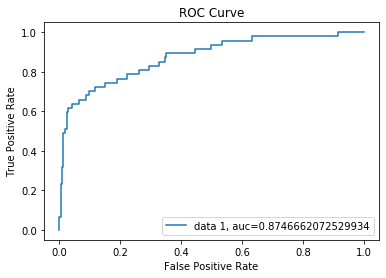

In [31]:
#final classification model
lr=LogisticRegression(C=3, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=3, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=True)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=22,stratify=y,shuffle=True)
lr.fit(train_x,train_y)
pred=lr.predict(test_x)
predict_proba = lr.predict_proba(test_x)[::,1]
score=cross_val_score(lr,x,y,cv=10,scoring='accuracy').mean()

print('Model score is:',lr.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')
print('Confusion matrix for themodel is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 9 HR Analytics Project.csv')

In [33]:
# saving the model using pickle.
joblib.dump(lr,'lr_Project 9 HR Analytics Project.pkl')

['lr_Project 9 HR Analytics Project.pkl']